<a href="https://colab.research.google.com/github/yoshitha1209/Machine-Learning/blob/main/23003_lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Entropy: 2.0379824680583014
Gini Index: 0.7267650779729249


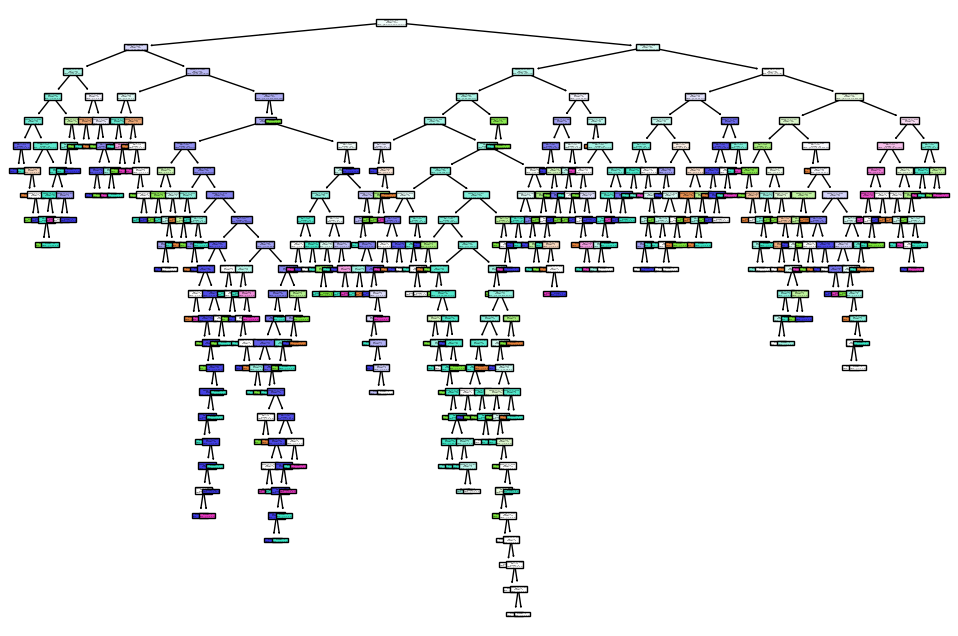

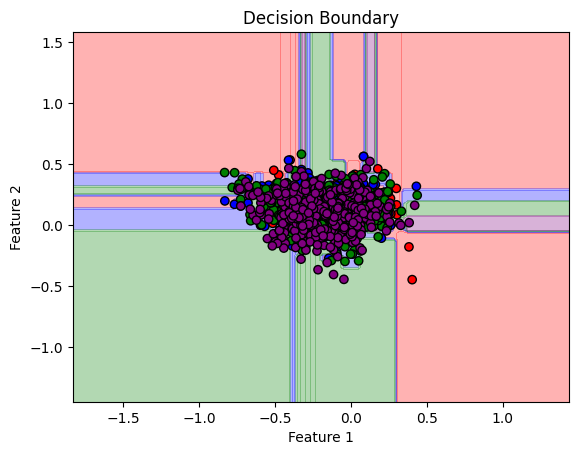

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from math import log2
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import KBinsDiscretizer

def load_dataset(file_path):
    df = pd.read_excel(file_path, sheet_name='Sheet1')
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values

    y_binned = equal_width_binning(y, num_bins=4)

    return X, y_binned

def entropy(y):
    counts = Counter(y)
    total = len(y)
    return -sum((count/total) * log2(count/total) for count in counts.values())

def gini_index(y):
    counts = Counter(y)
    total = len(y)
    return 1 - sum((count/total) ** 2 for count in counts.values())

def equal_width_binning(data, num_bins):
    bins = np.linspace(min(data), max(data), num_bins + 1)
    return np.digitize(data, bins) - 1

def information_gain(X, y, feature_index):
    total_entropy = entropy(y)
    values, counts = np.unique(X[:, feature_index], return_counts=True)
    weighted_entropy = sum((counts[i] / len(y)) * entropy(y[X[:, feature_index] == values[i]]) for i in range(len(values)))
    return total_entropy - weighted_entropy


def best_split(X, y):
    return np.argmax([information_gain(X, y, i) for i in range(X.shape[1])])

def visualize_tree(X, y):
    clf = DecisionTreeClassifier()
    clf.fit(X, y)
    plt.figure(figsize=(12, 8))
    plot_tree(clf, filled=True, feature_names=[f'embed_{i}' for i in range(X.shape[1])])
    plt.show()

def visualize_decision_boundary(X, y):
    from matplotlib.colors import ListedColormap
    clf = DecisionTreeClassifier()
    clf.fit(X[:, :2], y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['red', 'blue', 'green', 'purple']))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=ListedColormap(['red', 'blue', 'green', 'purple']))
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()


if __name__ == "__main__":

    file_path = "/Copy of training_mathbert(1).xlsx"
    X, y = load_dataset(file_path)

    print("Entropy:", entropy(y))
    print("Gini Index:", gini_index(y))


    visualize_tree(X, y)
    visualize_decision_boundary(X, y)

